# Punti nel complesso

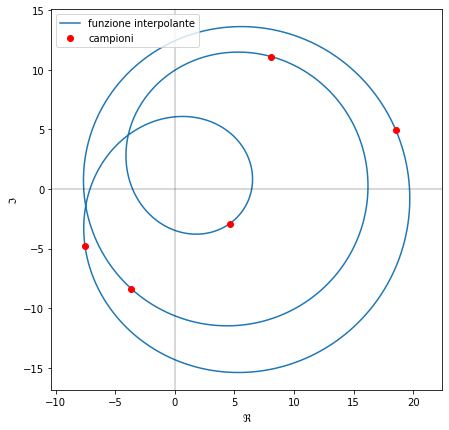

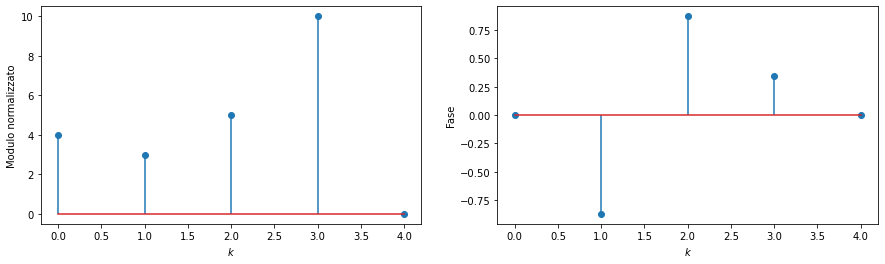

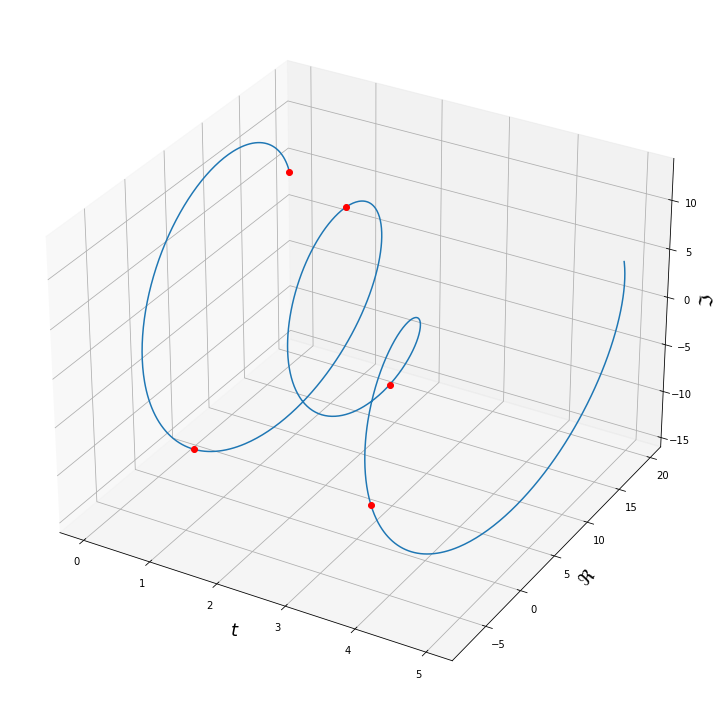

In [24]:
import numpy as np
import matplotlib.pyplot as plt

campioni = np.array([
 (18.539227085351403+4.952290319494642j),
 (-3.661856102387093-8.376165423301016j),
 (8.077654884576559+11.113567453890868j),
 (4.596131253262574-2.914101368486083j),
 (-7.551157120803425-4.7755909815983975j)
 ])

# numero campioni
N = len(campioni)

# pulsazione fondamentale
w = 2/N*np.pi

# calcolo dei coefficienti ck
C = []
for k in range(0,N):
  ck = 0
  for h in range(N):
    ck += campioni[h] * np.exp(-1j*h*k*w)
  C.append(ck)

# costruzione della funzione che interpola gli N punti
def f(t):
  risultato = 0
  for k in range(0, N):
    risultato += C[k] * np.exp(1j*k*w*t )
  return 1/N * risultato

# punti per rappresentare la funzione
t = np.linspace(0,N,1000)
plt.figure(figsize=(7,7))
plt.axis('equal')
plt.plot(f(t).real, f(t).imag, label = 'funzione interpolante')
plt.plot(np.real(campioni),np.imag(campioni), 'or', label = 'campioni')
plt.legend(loc='upper left')
plt.xlabel('$\Re$')
plt.ylabel('$\Im$')
plt.axhline(0, color='black', lw = 0.3)
plt.axvline(0, color='black', lw = 0.3)
plt.show()

# modulo normalizzato e fase dei coefficienti complessi
C_modulo = np.where(np.abs(C)>1e-5,np.abs(C)/N, 0)
C_fase = np.where(np.abs(C)>1e-5, np.angle(C), 0)

plt.figure(figsize=(15,4))
plt.subplot(121)
plt.stem(C_modulo)
plt.xlabel("$k$")
plt.ylabel("Modulo normalizzato")
plt.subplot(122)
plt.stem(C_fase)
plt.xlabel("$k$")
plt.ylabel("Fase")
plt.show()

t_campioni = np.arange(0, N)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('$t$', fontsize=18)
ax.set_ylabel('$\Re$', fontsize=18)
ax.set_zlabel('$\Im$', fontsize=18)
ax.plot3D(t, f(t).real, f(t).imag)
ax.plot3D(t_campioni, np.real(campioni),np.imag(campioni),'or')
plt.tight_layout()
plt.show()

## Video

In [ ]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

class Fasore:
  def __init__(self, ck, w):
    self.ck = ck/N # valori normalizzati
    self.w = w

  def al_tempo(self,t):
    return self.ck * np.exp(1j * self.w * t)

w = 2*np.pi/N # pulsazione fondamentale
fasori = []

for k in range(N):  # creo i fasori
  fasori.append(Fasore(C[k], k*w))

fig, ax = plt.subplots(figsize=(5,5))
ax.set_xlim(-10, 21)
ax.set_ylim(-16, 15)

t_istantanea = 0 # tempo al quale "scatto" una fotografia della posizione dei fasori
t = np.linspace(0,t_istantanea,1000)

old_risultante = 0+0j
risultante = 0+0j
for fasore in fasori:
  risultante += fasore.al_tempo(t_istantanea)
  ax.quiver([old_risultante.real], [old_risultante.imag],\
             [risultante.real - old_risultante.real],\
             [risultante.imag - old_risultante.imag],\
             angles='xy', scale_units='xy', scale=1, width=0.005)
  old_risultante = risultante

# Funzione per inizializzare il grafico
def init():
    ax.set_xlim(-10, 21)
    ax.set_ylim(-16, 15)
    return []

# Funzione di aggiornamento per ogni frame dell'animazione
def update(frame):
    ax.clear()
    ax.set_xlim(-10, 21)
    ax.set_ylim(-16, 15)

    t_istantanea = frame / 25  # Variare t_istantanea tra 0 e 5 in 125 frames
    t = np.linspace(0, t_istantanea, 1000)

    old_risultante = 0 + 0j
    risultante = 0 + 0j
    for fasore in fasori:
        risultante += fasore.al_tempo(t_istantanea)
        ax.quiver([old_risultante.real], [old_risultante.imag],
                   [risultante.real - old_risultante.real],
                   [risultante.imag - old_risultante.imag],
                   angles='xy', scale_units='xy', scale=1, width=0.005)
        old_risultante = risultante

    ax.plot(f(t).real, f(t).imag)
    ax.plot(np.real(campioni), np.imag(campioni), '.r')
    ax.set_xlabel('$\Re$')
    ax.set_ylabel('$\Im$')
    ax.axhline(0, color='black', lw=0.3)
    ax.axvline(0, color='black', lw=0.3)

    return []

# Configurazione iniziale
fig, ax = plt.subplots(figsize=(5, 5))

# Crea l'animazione
animation = FuncAnimation(fig, update, frames=np.arange(0, 125), init_func=init, blit=True)

# Visualizza l'animazione nel notebook
HTML(animation.to_html5_video())

# Punti nel complesso con shift

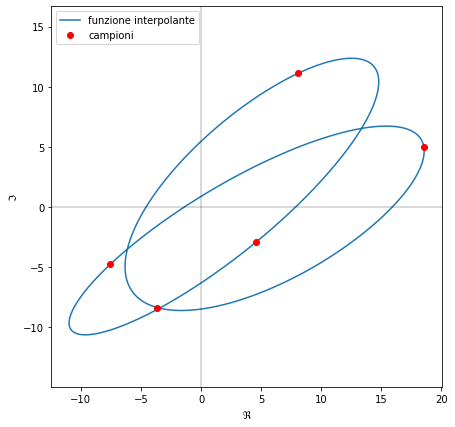

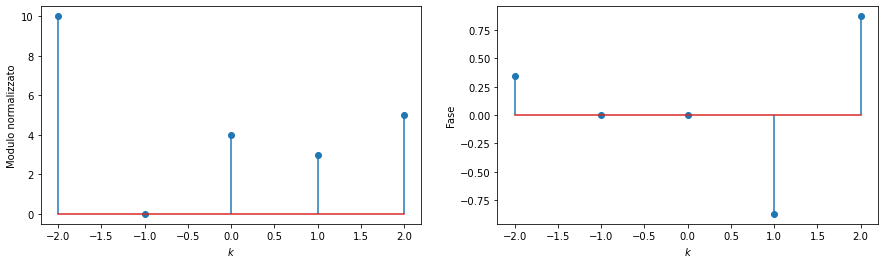

In [25]:
import numpy as np
import matplotlib.pyplot as plt

campioni = np.array([
 (18.539227085351403+4.952290319494642j),
 (-3.661856102387093-8.376165423301016j),
 (8.077654884576559+11.113567453890868j),
 (4.596131253262574-2.914101368486083j),
 (-7.551157120803425-4.7755909815983975j)
 ])

# numero campioni
N = len(campioni)

# pulsazione fondamentale
w = 2/N*np.pi

# calcolo dei coefficienti ck
# shift di k
shift = -2
C = []
for k in range(0+shift, N+shift):
  ck = 0
  for h in range(N):
    ck += campioni[h] * np.exp(-1j*h*k*w)
  C.append(ck)

# costruzione della funzione che interpola gli N punti
def f(t):
  risultato = 0
  for k in range(0+shift, N+shift):
    risultato += C[k-shift] * np.exp(1j*k*w*t )
  return 1/N * risultato

# punti per rappresentare la funzione
t = np.linspace(0,N,1000)
plt.figure(figsize=(7,7))
plt.axis('equal')
plt.plot(f(t).real, f(t).imag, label = 'funzione interpolante')
plt.plot(np.real(campioni),np.imag(campioni), 'or', label = 'campioni')
plt.legend(loc='upper left')
plt.xlabel('$\Re$')
plt.ylabel('$\Im$')
plt.axhline(0, color='black', lw = 0.3)
plt.axvline(0, color='black', lw = 0.3)
plt.show()

# modulo normalizzato e fase dei coefficienti complessi
C_modulo = np.where(np.abs(C)>1e-5,np.abs(C)/N, 0)
C_fase = np.where(np.abs(C)>1e-5, np.angle(C), 0)

plt.figure(figsize=(15,4))
plt.subplot(121)
plt.stem([k for k in range(0+shift, N+shift)], C_modulo)
plt.xlabel("$k$")
plt.ylabel("Modulo normalizzato")
plt.subplot(122)
plt.stem([k for k in range(0+shift, N+shift)], C_fase)
plt.xlabel("$k$")
plt.ylabel("Fase")
plt.show()

# Periodicità dello spettro

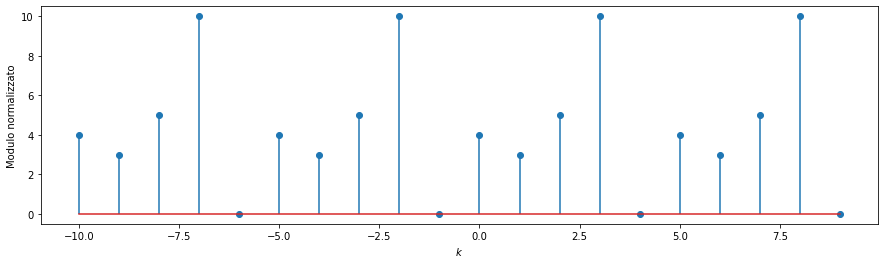

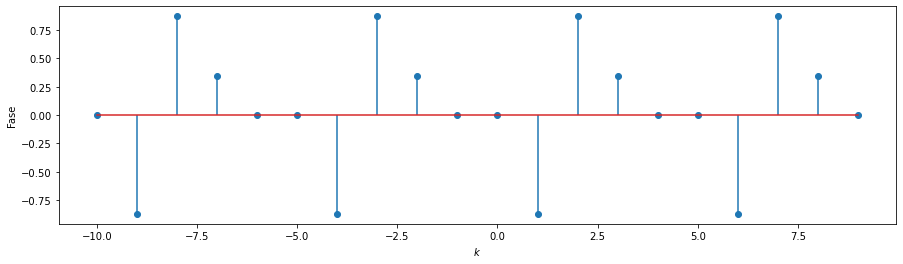

In [26]:
import numpy as np
import matplotlib.pyplot as plt

campioni = np.array([
 (18.539227085351403+4.952290319494642j),
 (-3.661856102387093-8.376165423301016j),
 (8.077654884576559+11.113567453890868j),
 (4.596131253262574-2.914101368486083j),
 (-7.551157120803425-4.7755909815983975j)
 ])

# numero campioni
N = len(campioni)

# pulsazione fondamentale
w = 2/N*np.pi

# calcolo dei coefficienti ck
k_min = -10
k_max = 10
C = []
for k in range(k_min, k_max):
  ck = 0
  for h in range(N):
    ck += campioni[h] * np.exp(-1j*h*k*w)
  C.append(ck)

# modulo normalizzato e fase dei coefficienti complessi
C_modulo = np.where(np.abs(C)>1e-5,np.abs(C)/N, 0)
C_fase = np.where(np.abs(C)>1e-5, np.angle(C), 0)

plt.figure(figsize=(15,4))
plt.stem([k for k in range(k_min, k_max)], C_modulo)
plt.xlabel("$k$")
plt.ylabel("Modulo normalizzato")
plt.show()
plt.figure(figsize=(15,4))
plt.stem([k for k in range(k_min, k_max)], C_fase)
plt.xlabel("$k$")
plt.ylabel("Fase")
plt.show()

# Punti nel reale

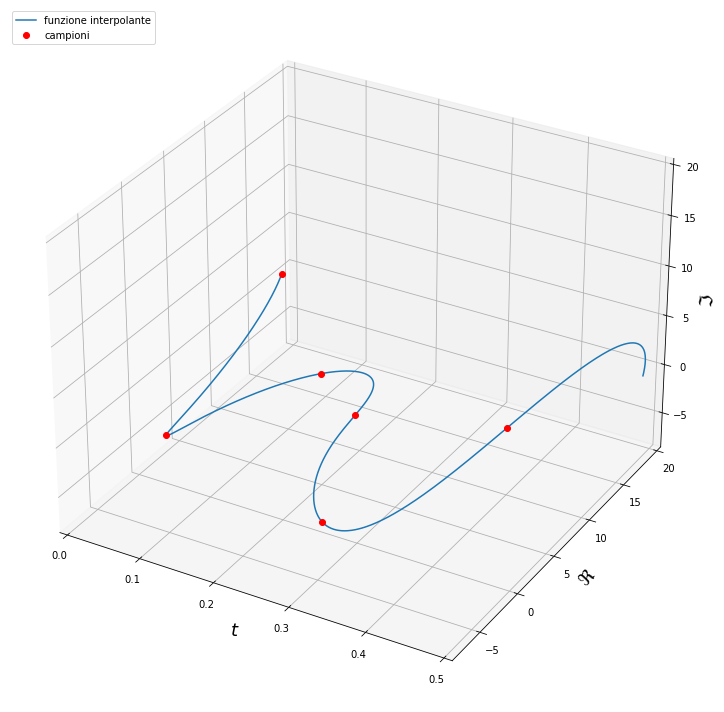

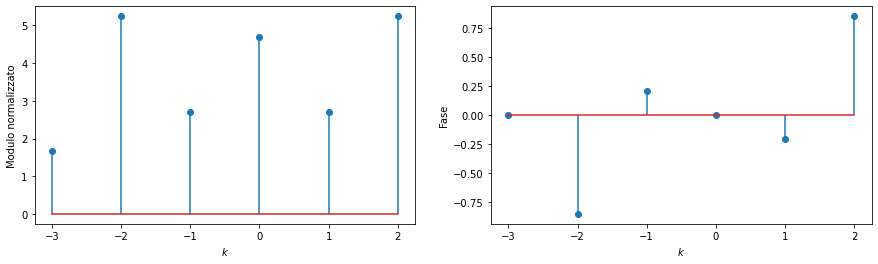

In [27]:
#ipotizzando che il periodo di campionamento sia di 0.5 secondi e che i campioni raccolti siano 5
import numpy as np
import matplotlib.pyplot as plt

campioni = np.array([18.539227085351403,
                     -3.661856102387093,
                     8.077654884576559,
                     4.596131253262574,
                     -7.551157120803425,
                     8.126537489323123
                     ])
#Tempo di campionamento
T = 0.5

# numero campioni
N = len(campioni)

# pulsazione fondamentale
w = 2/T*np.pi

# calcolo dei coefficienti ck
# shift di k
shift = -3
C = []
for k in range(0+shift, N+shift):
  ck = 0
  for h in range(N):
    ck += campioni[h] * np.exp(-1j*h*k*2*np.pi/N)
  C.append(ck)

# costruzione della funzione che interpola gli N punti
def f(t):
  risultato = 0
  for k in range(0+shift, N+shift):
    risultato += C[k-shift] * np.exp(1j*k*w*t )
  return 1/N * risultato

t = np.linspace(0,T,1000)
t_campioni = np.arange(0, T, T/N)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('$t$', fontsize=18)
ax.set_ylabel('$\Re$', fontsize=18)
ax.set_zlabel('$\Im$', fontsize=18)
ax.set_xlim([0, T])
ax.set_ylim([-8, 20])
ax.set_zlim([-8, 20])
ax.plot3D(t, f(t).real, f(t).imag, label = 'funzione interpolante')
ax.plot3D(t_campioni, np.real(campioni),np.imag(campioni),'or', label = 'campioni')
ax.legend(loc='upper left')
plt.tight_layout()
plt.show()

# modulo normalizzato e fase dei coefficienti complessi
C_modulo = np.where(np.abs(C)>1e-5,np.abs(C)/N, 0)
C_fase = np.where(np.abs(C)>1e-5, np.angle(C), 0)

plt.figure(figsize=(15,4))
plt.subplot(121)
plt.stem([k for k in range(0+shift, N+shift)], C_modulo)
plt.xlabel("$k$")
plt.ylabel("Modulo normalizzato")
plt.subplot(122)
plt.stem([k for k in range(0+shift, N+shift)], C_fase)
plt.xlabel("$k$")
plt.ylabel("Fase")
plt.show()

# Frequenza di campionamento

f fondamentale 1 Hz
periodo 1.0 s
tempo di campionamento 10.5


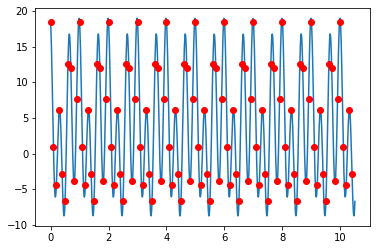

shift -52


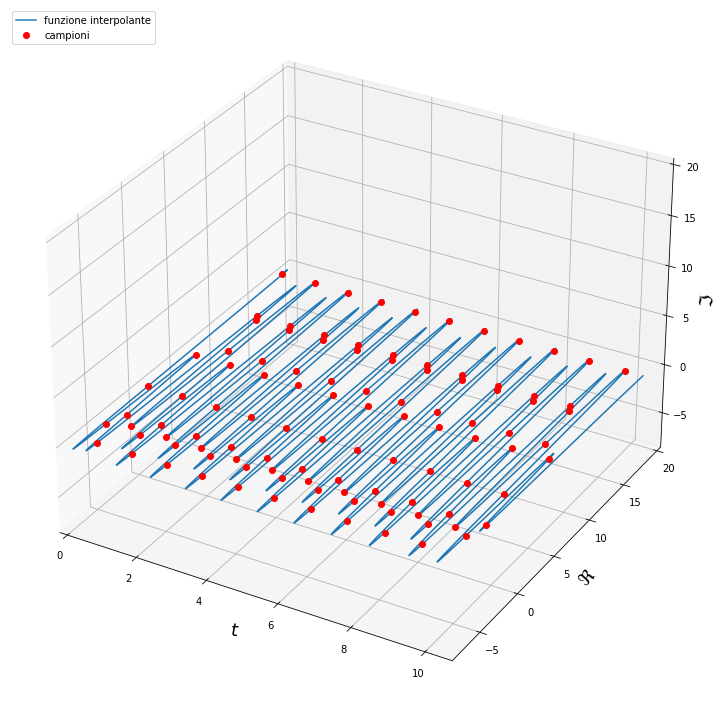

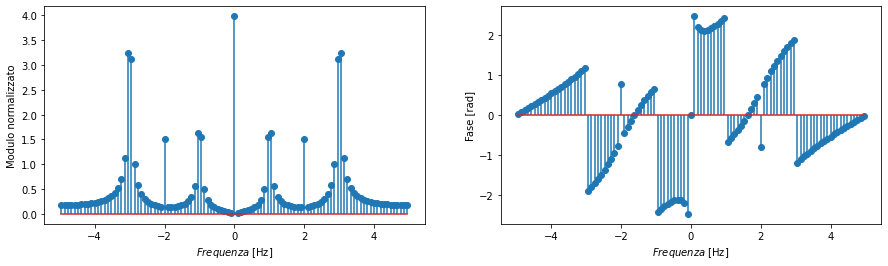

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# parametri del segnale
A = [4,10,5,3]
freq = [0,3,1,2] # Hz
fasi = [0,20,50,-50] # ˚

# costruzione del segnale nel reale
def v(t):
  risultato = 0
  for A_i,freq_i,fase_i in zip(A,freq,fasi):
    risultato += A_i * np.exp(1j*(2*np.pi * freq_i * t + fase_i * np.pi/180))
  return risultato.real

# MCD delle frequenze componenti il segnale
f_fond = np.gcd.reduce(freq)
print('f fondamentale', f_fond, 'Hz')

# periodo del segnale
T = 1/f_fond
print('periodo', T, 's')

# campionamento
f_camp = 10 # Hz
N = 105
t_campionamento = N * 1/f_camp
print('tempo di campionamento', t_campionamento)
t_campioni = np.arange(0,t_campionamento,1/f_camp)
campioni = v(t_campioni)

# visualizzazione della funzione
t = np.linspace(0,t_campionamento,1000)
plt.plot(t,v(t).real)
# visualizzazione dei campioni
plt.plot(t_campioni, campioni.real,'or')
plt.show()

# pulsazione fondamentale
w = 2/t_campionamento*np.pi

# calcolo dei coefficienti ck
shift = int(np.ceil(-N/2))
print('shift', shift)
C = []
for k in range(0+shift, N+shift):
  ck = 0
  for h in range(N):
    ck += campioni[h] * np.exp(-1j*h*k*2*np.pi/N)
  C.append(ck)

# costruzione della funzione che interpola gli N punti
def f(t):
  risultato = 0
  for k in range(0+shift, N+shift):
    risultato += C[k-shift] * np.exp(1j*k*w*t )
  return 1/N * risultato

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('$t$', fontsize=18)
ax.set_ylabel('$\Re$', fontsize=18)
ax.set_zlabel('$\Im$', fontsize=18)
ax.set_xlim([0, t_campionamento])
ax.set_ylim([-8, 20])
ax.set_zlim([-8, 20])
ax.plot3D(t, f(t).real, f(t).imag, label = 'funzione interpolante')
ax.plot3D(t_campioni, np.real(campioni),np.imag(campioni),'or', label = 'campioni')
ax.legend(loc='upper left')
plt.tight_layout()
plt.show()

# modulo normalizzato e fase dei coefficienti complessi
C_modulo = np.where(np.abs(C)>1e-5,np.abs(C)/N, 0)
C_fase = np.where(np.abs(C)>1e-5, np.angle(C), 0)

plt.figure(figsize=(15,4))
plt.subplot(121)
plt.stem([k*w/(2*np.pi) for k in range(0+shift, N+shift)], C_modulo)
plt.xlabel("$Frequenza$ [Hz]")
plt.ylabel("Modulo normalizzato")
plt.subplot(122)
plt.stem([k*w/(2*np.pi) for k in range(0+shift, N+shift)], C_fase)
plt.xlabel("$Frequenza$ [Hz]")
plt.ylabel("Fase [rad]")
plt.show()

# Aliasing

f fondamentale 1 Hz
periodo 1.0 s
tempo di campionamento 2.0


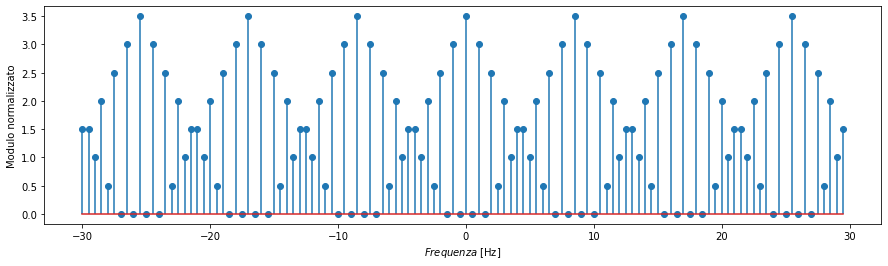

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# parametri del segnale
A = [3.5,6,5,4,3,2,1]
freq = [0,1,2,3,4,5,6] # Hz
fasi = [0,20,50,-50,10,50,-70] # ˚

# costruzione del segnale nel reale
def v(t):
  risultato = 0
  for A_i,freq_i,fase_i in zip(A,freq,fasi):
    risultato += A_i * np.exp(1j*(2*np.pi * freq_i * t + fase_i * np.pi/180))
  return risultato.real

# MCD delle frequenze componenti il segnale
f_fond = np.gcd.reduce(freq)
print('f fondamentale', f_fond, 'Hz')

# periodo del segnale
T = 1/f_fond
print('periodo', T, 's')

# campionamento
f_camp = 8.5 # Hz
N = int(2*f_camp)
t_campionamento = N * 1/f_camp
print('tempo di campionamento', t_campionamento)
t_campioni = np.arange(0,t_campionamento,1/f_camp)
campioni = v(t_campioni)

# pulsazione fondamentale
w = 2/t_campionamento*np.pi

# calcolo dei coefficienti ck
k_min = -60
k_max = 60
C = []
for k in range(k_min, k_max):
  ck = 0
  for h in range(N):
    ck += campioni[h] * np.exp(-1j*h*k*2*np.pi/N)
  C.append(ck)

# modulo normalizzato e fase dei coefficienti complessi
C_modulo = np.where(np.abs(C)>1e-5,np.abs(C)/N, 0)
C_fase = np.where(np.abs(C)>1e-5, np.angle(C), 0)

plt.figure(figsize=(15,4))
plt.stem([k*w/(2*np.pi)  for k in range(k_min, k_max)], C_modulo)
plt.xlabel("$Frequenza$ [Hz]")
plt.ylabel("Modulo normalizzato")
plt.show()